In [ ]:
import pandas as pd 
import platform
import matplotlib.pyplot as plt

In [ ]:
# csv 폴더 안에 card 폴더 안에 있는 오프라인.csv 파일 로드 
offline = pd.read_csv("../csv/card/오프라인.csv", encoding='cp949')

In [ ]:
offline.info()

In [ ]:
offline.head()

1. 컬럼의 이름을 변경 -> 항목정의서의 컬럼의 설명을 기준으로 컬럼의 이름을 변경 
2. 결측치가 존재하는가?
    - non-null count을 기준으로 확인
    - 성별 컬럼에는 '-', 9 라는 데이터가 존재하는가?
3. 기준년월의 데이터를 시계열 데이터로 변환
4. 남, 여 성별을 기준으로 연도별 건당 이용 금액의 평균은 어떠한 차이를 나타내는가?
    - 기준년월의 시계열에서 년도를 추출하여 새로운 컬럼에 대입 
    - 건당이용금액 컬럼을 생성하여 총이용금액 / 총건수
    - 성별, 기준년 컬럼의 데이터로 그룹화 건당이용금액의 평균을 구한다. 
5. 해당 데이터를 막대그래프로 시각화 

In [ ]:
# 항목정의서 파일을 로드 
col_info = pd.read_excel(
    "../csv/card/(수정)(항목정의서)유통+업종+카드소비트랜드+데이터_20211101.xlsx"
)

In [ ]:
offline.columns = col_info['데이터 컬럼'].to_list()

In [ ]:

offline.head()

In [ ]:
offline.columns

In [ ]:

offline.info()

In [ ]:
# 성별 컬럼에 '-', 9 데이터가 존재하는가?
# offline['성별'].isin(['-', '9', 9]).sum()
# offline['성별'].isin(['-', '9', 9]).any()
offline['성별'].isin([1, 2]).all()

In [ ]:
offline['성별'].value_counts()

In [ ]:
# 유일한 데이터를 출력 
offline['성별'].unique()

In [ ]:
# 기준년월 데이터를 시계열로 변경 
pd.to_datetime( offline['기준년월'] , format='%Y%m')

In [ ]:
from datetime import datetime

In [ ]:
offline['기준년월'].map(
    lambda x : datetime.strptime(str(x), '%Y%m')
)

In [ ]:
offline['기준년월'] = offline['기준년월'].astype(str).map(
    lambda x : datetime.strptime(x, '%Y%m')
)

In [ ]:
# 기준년 이라는 컬럼을 생성해서 기준년월에서 년도만 추출하여 대입 
offline['기준년월'].dt.year

In [ ]:
offline['기준년'] = offline['기준년월'].dt.strftime('%Y')

In [ ]:
# 건당이용금액
offline['건당이용금액'] = (offline['이용 금액'] / offline['이용 건수']).round(2)

In [68]:
# 성별, 기준년을 이용하여 그룹화 
group_data = offline.groupby( ['기준년', '성별' ] )[ '건당이용금액' ].mean()

In [70]:
# 그래프에서 한글 깨짐 방지
if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='Malgun Gothic')

<Axes: xlabel='기준년,성별'>

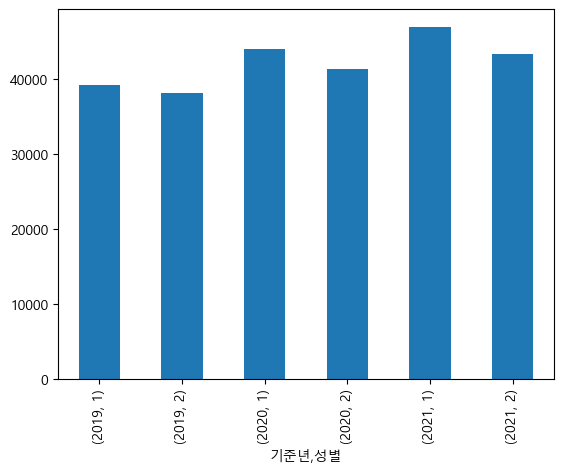

In [71]:
group_data.plot(kind='bar')

<Axes: xlabel='기준년'>

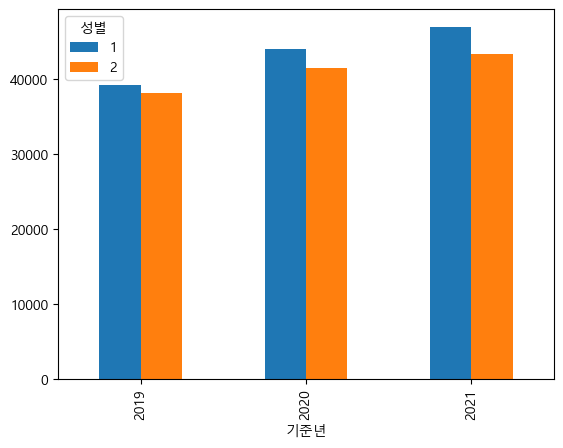

In [73]:
group_data.unstack().plot(kind='bar')

<Axes: xlabel='기준년'>

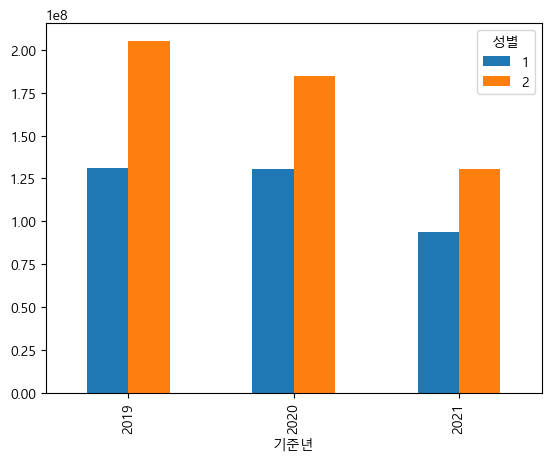

In [77]:
# 년도, 성별 이용 건수의 합계를 확인 
offline.pivot_table(
    index = '기준년', 
    columns = '성별', 
    values = '이용 건수',
    aggfunc= 'sum'
).plot(kind='bar')

<Axes: xlabel='기준년월'>

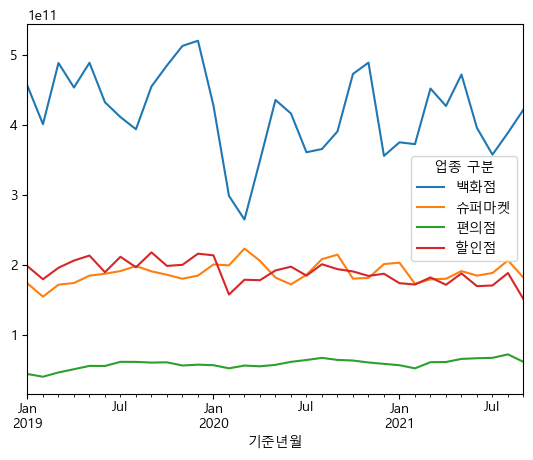

In [82]:

offline.pivot_table(
    index = '기준년월', 
    columns= '업종 구분', 
    values = '이용 금액', 
    aggfunc= 'sum'
).plot()

In [84]:
offline['연령대'].value_counts()

연령대
10    264
20    264
30    264
70    264
40    264
50    264
60    264
90    264
80    264
0     233
1      39
Name: count, dtype: int64

In [93]:
# 업종, 연령대 별로 월별 이용금액의 합계, 총 이용건수 
group_data2 = offline.pivot_table(
    index = '기준년', 
    columns = ['업종 구분', '연령대'], 
    values = ['이용 건수', '이용 금액'], 
    aggfunc= 'sum', 
    fill_value=0
)

In [94]:
df1 = group_data2['이용 건수']

In [95]:
df2 = group_data2['이용 금액']

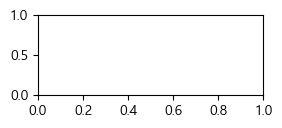

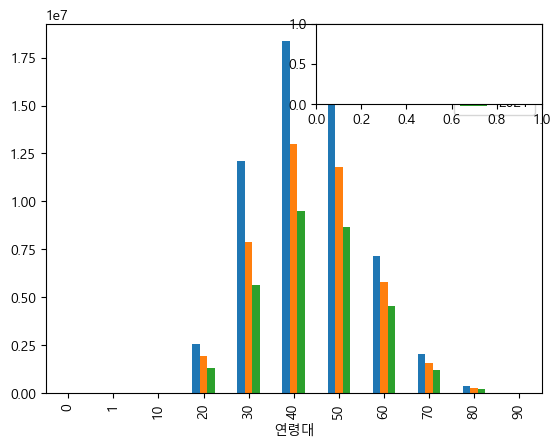

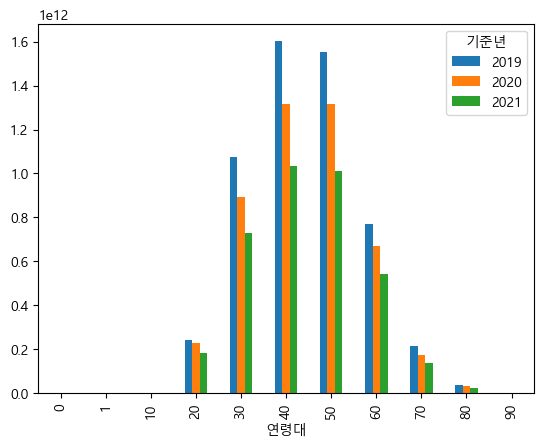

In [104]:
plt.subplot(4, 2, 1)
df1['백화점'].T.plot(kind='bar')
plt.subplot(4, 2, 2)
df2['백화점'].T.plot(kind='bar')
plt.show()

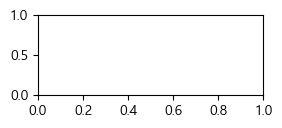

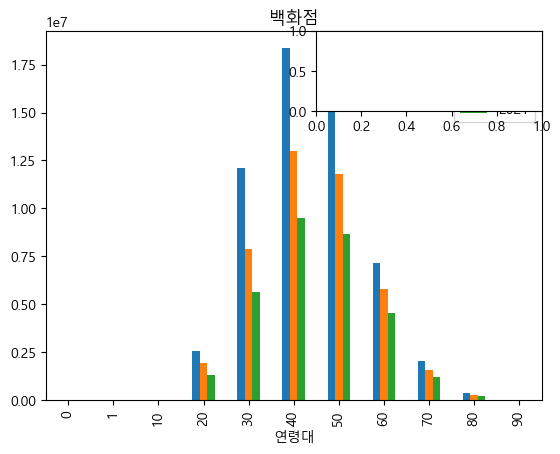

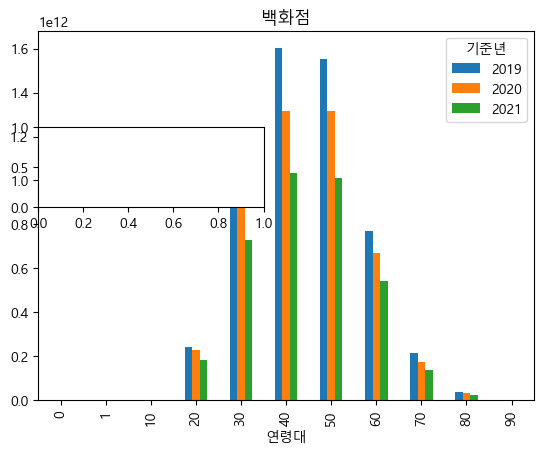

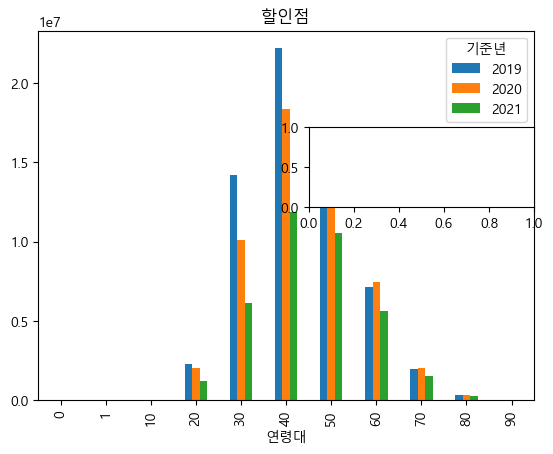

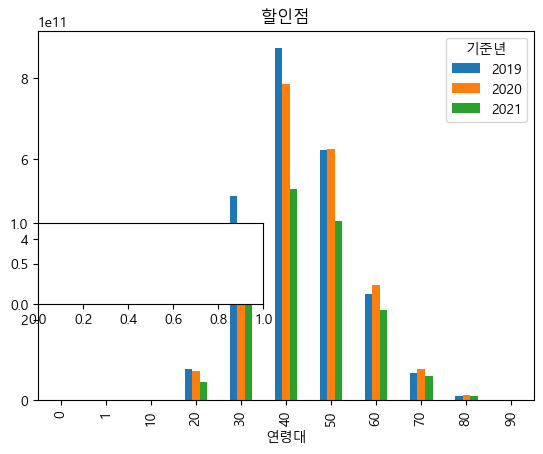

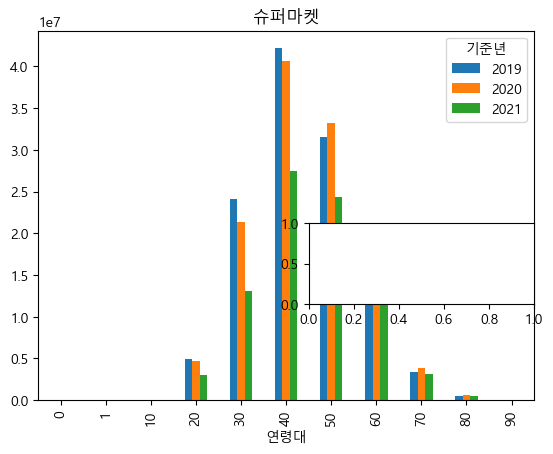

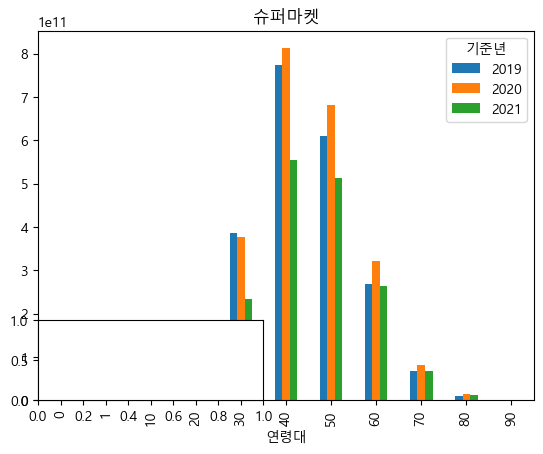

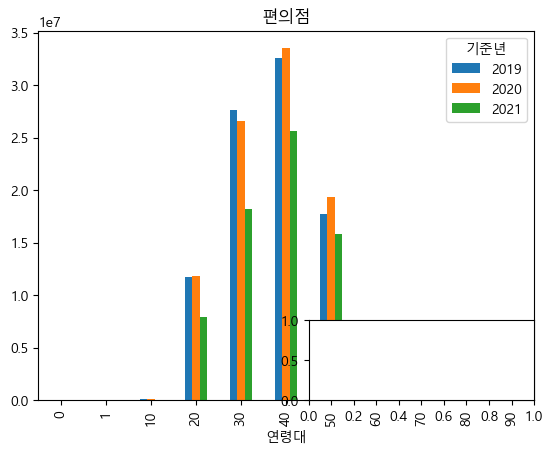

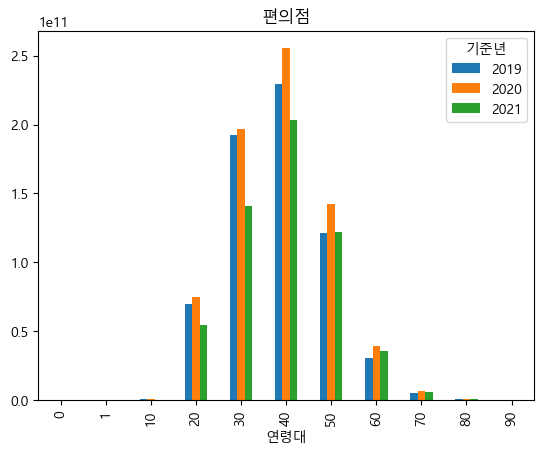

In [106]:
# 8(4*2)개의 공간을 생성하고 반복 실행할때 행이 1씩 증가하는 위치에 그래프 그린다. 
# plt.figure(figsize=(20, 30))
# 업종의 수만큼 반복 실행
_list = offline['업종 구분'].unique()
for i in range(len(_list)):
    plt.subplot(4, 2, i * 2 + 1)
    # df1의 특정 컬럼을 선택하고 전치하여 막대그래프로 표시 
    df1[_list[i]].T.plot(kind='bar')
    # 그래프의 이름은 해당 컬럼의 이름으로 지정
    plt.title(_list[i])
    plt.subplot(4, 2, i * 2 + 2)
    df2[_list[i]].T.plot(kind='bar')
    plt.title(_list[i])
plt.show()